# Libreta de ejecucion de Datos de Trabajo

In [2]:
import pandas as pd
import numpy as np
from sistema_economico import econoblack
import utilidades_locales as tools

# Rutas generales
rutaResultadosCompleto = '.'
rutaModeloCualquiera = './resultadosAleatorios'
rutaModeloPrimero = './resultadosUnicaGeneracion'

## Parametros de Sistema Economico 

In [2]:
#modelo 1
propConsumo = 0.7
AphC = 0.1
AphIn = 0.7
intRate = 0.20
year = 25
camPre = 10

## Modelo Economico Regulado

Resultados escritos en .


/home/zero/Documentos/TRABAJO FINAL/codigoPreliminar/sistema_economico/banco_central.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_decomp["cycle"] = cycle
/home/zero/Documentos/TRABAJO FINAL/codigoPreliminar/sistema_economico/banco_central.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_decomp["trend"] = trend


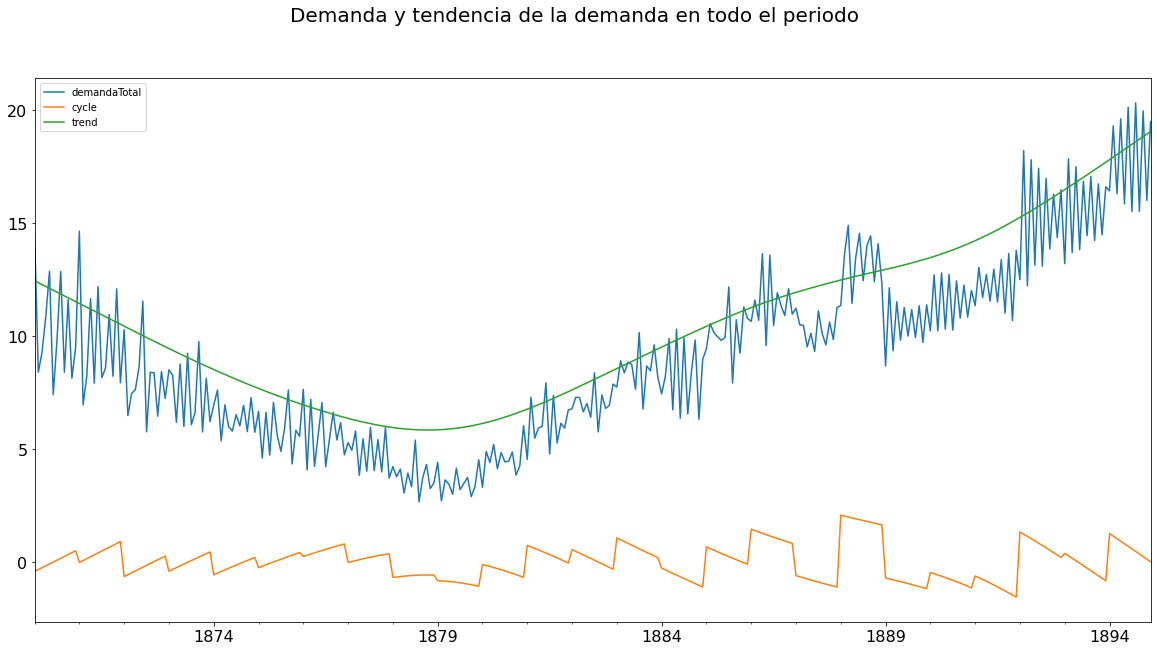

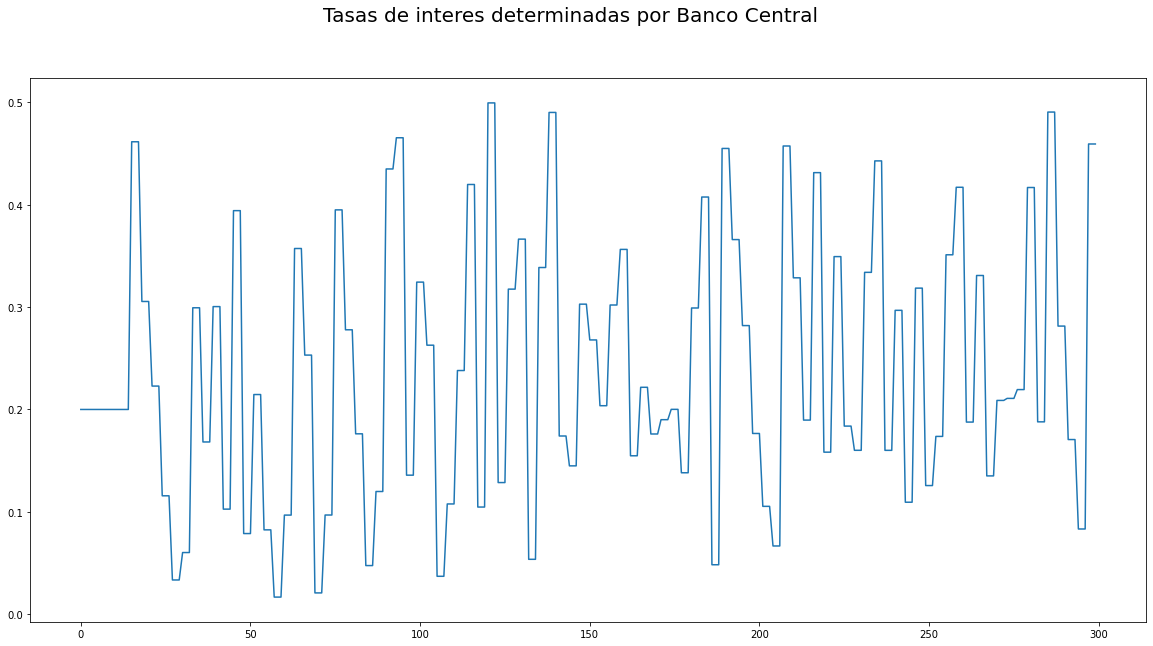

In [3]:
modelo = econoblack.economy(year, cambioPrefe = camPre, r=intRate)
modelo.ruta = rutaResultadosCompleto
modelo.agenteConsumidor(propConsumo)
modelo.agenteprodConsumo(alpci=AphC, tci=1, deci=10)
modelo.agenteprodInver(alpin=AphIn, tin=1)
modelo.generarSistema()

## Modelo Economico de Libre Mercado

Resultados escritos en .


/home/zero/Documentos/TRABAJO FINAL/codigoPreliminar/sistema_economico/banco_central.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_decomp["cycle"] = cycle
/home/zero/Documentos/TRABAJO FINAL/codigoPreliminar/sistema_economico/banco_central.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_decomp["trend"] = trend


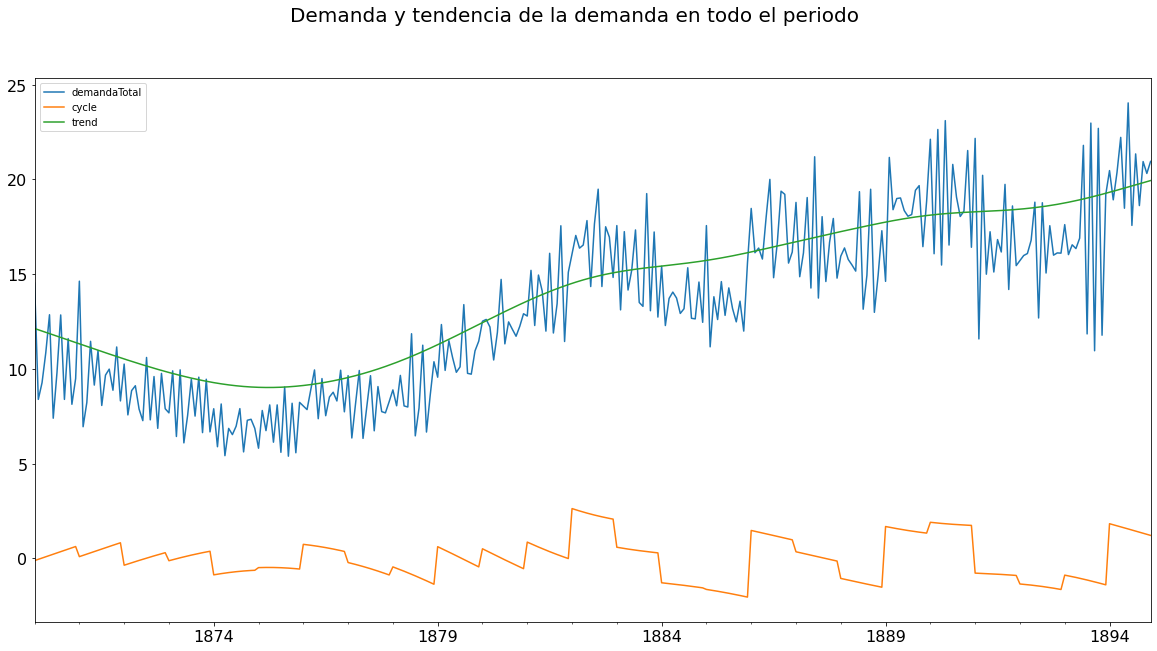

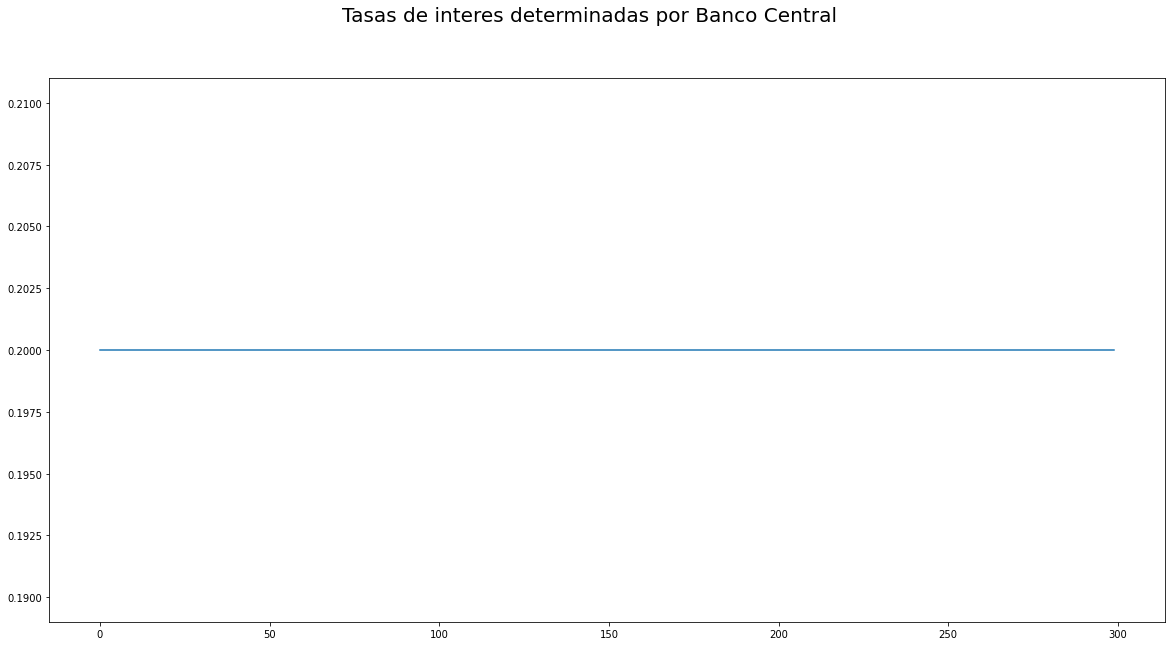

In [4]:
# libre mercado
modelo = econoblack.economy(year, cambioPrefe=camPre, r=intRate)
modelo.ruta = rutaResultadosCompleto
modelo.agenteConsumidor(propConsumo)
modelo.agenteprodConsumo(alpci=AphC, tci=1, deci=10)
modelo.agenteprodInver(alpin=AphIn, tin=1)
modelo.generarSistema(freeMarket=True)

## Comparacion de Sistemas Regulado y no Regulado 

### Graficos de Comparacion

In [4]:
encabezadoSistema = ['year', 'periodo', 'demandaTotal', 
'consumo', 'ingreso', 'demandaCapital', 'consumoAuto', 
'ksCon', 'ksInv', 'ofertaGlob','save', 'tasaInteres']

# Variables comunes comparacion 
encabezadosRevisar = ['demandaTotal', 'ksCon',
                    'ksInv', 'ingreso', 'save', 'tasaInteres']

# Encabezados sistema regulado
encaRegulado = ['DemandaReg', 'ksConReg', 'ksInvReg',
                'ingresoReg', 'saveReg', 'tasaInteresReg']

# Encabezados sistema no regulado
encaNoRegulado = ['DemandaFree', 'ksConFree', 'ksInvFree',
                'ingresoFree', 'saveFree', 'tasaInteresFree']

# archivos de resultados
archivoPol = f'{rutaResultadosCompleto}/SISTEMAECOPOLMON.txt'
archivoFree = f'{rutaResultadosCompleto}/SISTEMAECOFREE.txt'


datosPol = tools.getDatos(archivoPol, encabezadoSistema)
datosFree = tools.getDatos(archivoFree, encabezadoSistema)

compare = tools.makeCompareDf(datosPol, datosFree, 
                            encabezadosRevisar, encabezadosRevisar,
                            encaRegulado, encaNoRegulado)

### Graficas de componentes

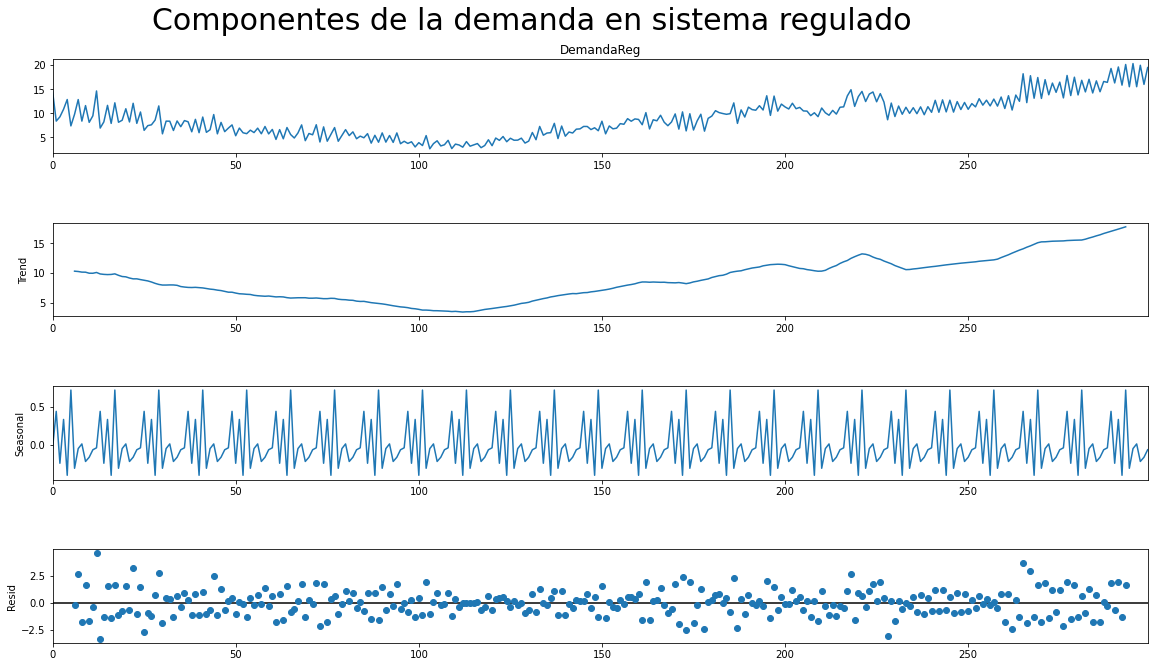

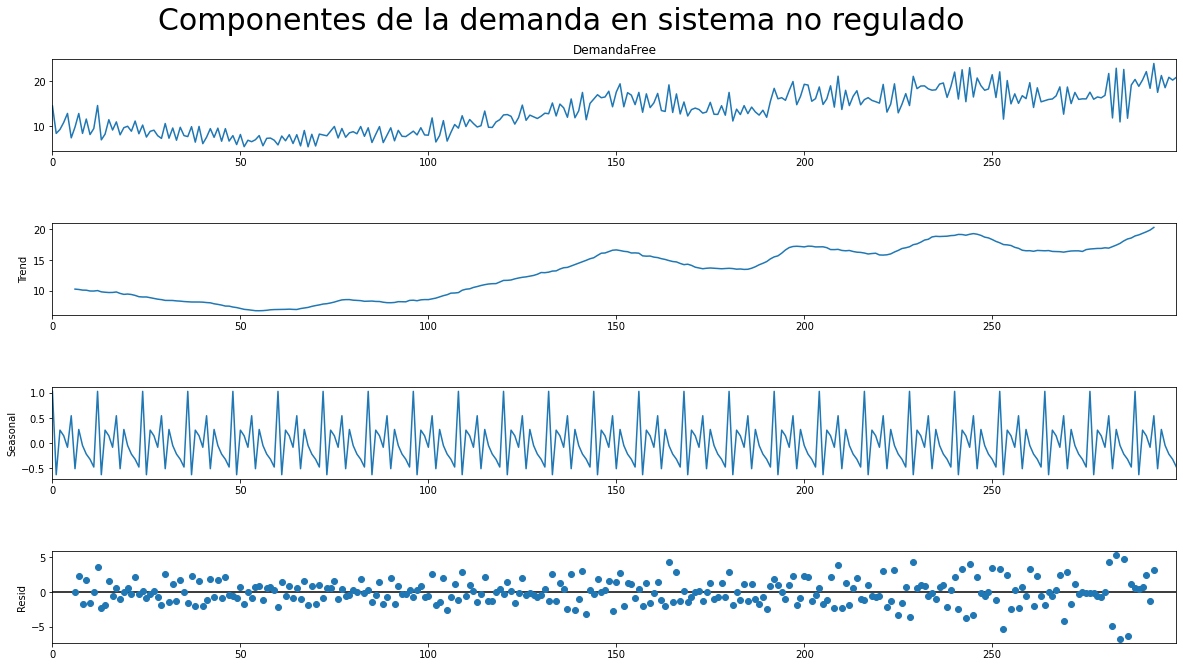

In [7]:
decomDemReg = tools.ver_componentes('DemandaFree', compare, titulo='Componentes de la demanda en sistema no regulado')

### Pruebas Estadisticas de varianza de sistemas regulados y no regulados

In [8]:
tools.f_test(compare.DemandaReg.values.tolist(),compare.DemandaFree.values.tolist())

4649.480728312003 6099.876743060795 299 299


(1.3119479570948474, 0.009592844546391421, 1.2099167425932442)

In [9]:
tools.f_test(compare.ingresoReg.values.tolist(),compare.ingresoFree.values.tolist())

3824.383089578563 5338.661002748682 299 299


(1.3959535113771744, 0.002020103878093815, 1.2099167425932442)

In [10]:
tools.f_test(compare.saveReg.values.tolist(),compare.saveFree.values.tolist())

2908.347478230082 2983.0822781798406 299 299


(1.0256966543747517, 0.41325664698237274, 1.2099167425932442)

<module 'matplotlib.pyplot' from '/home/zero/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

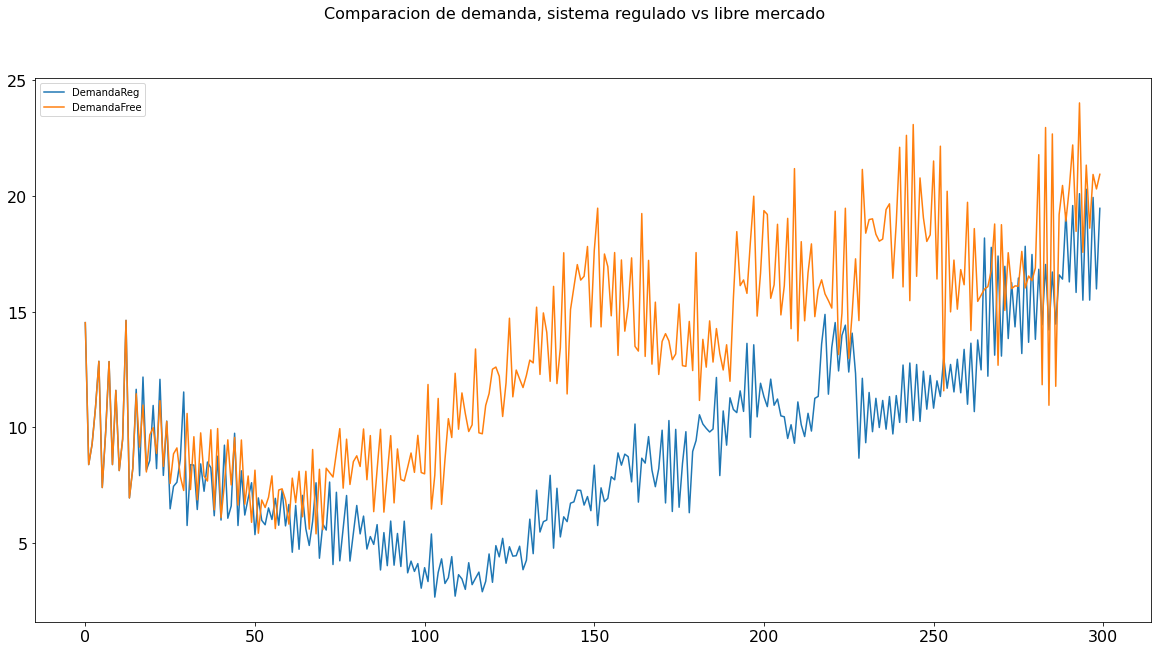

In [5]:
tools.graficar_comparacion(compare, ["DemandaReg", "DemandaFree"],
                        'Comparacion de demanda, sistema regulado vs libre mercado')

<module 'matplotlib.pyplot' from '/home/zero/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

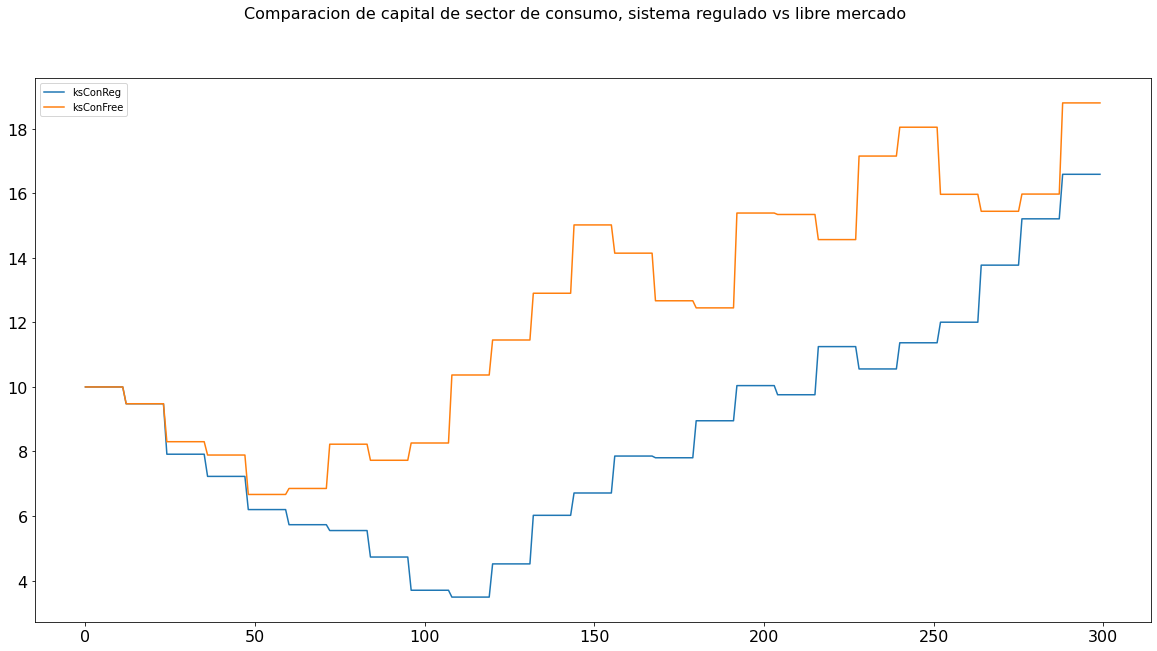

In [6]:
tools.graficar_comparacion(compare, ["ksConReg", "ksConFree"],
                        'Comparacion de capital de sector de consumo, sistema regulado vs libre mercado')

<module 'matplotlib.pyplot' from '/home/zero/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

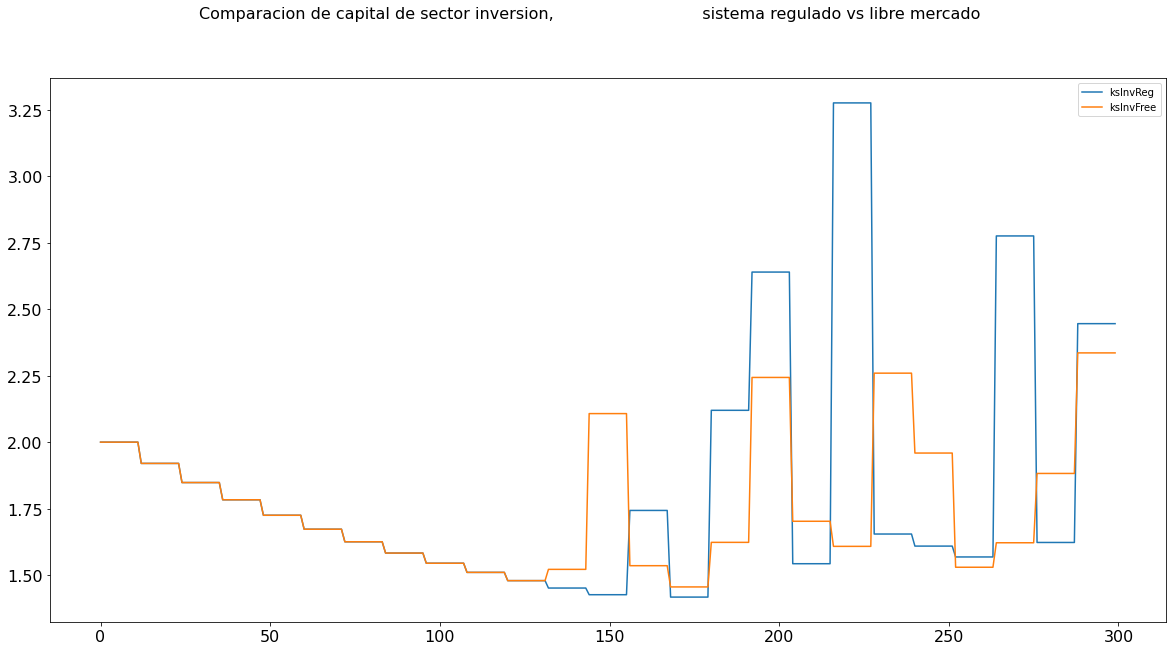

In [13]:
tools.graficar_comparacion(compare, ["ksInvReg", "ksInvFree"],
                        'Comparacion de capital de sector inversion, \
                            sistema regulado vs libre mercado')


<module 'matplotlib.pyplot' from '/home/zero/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

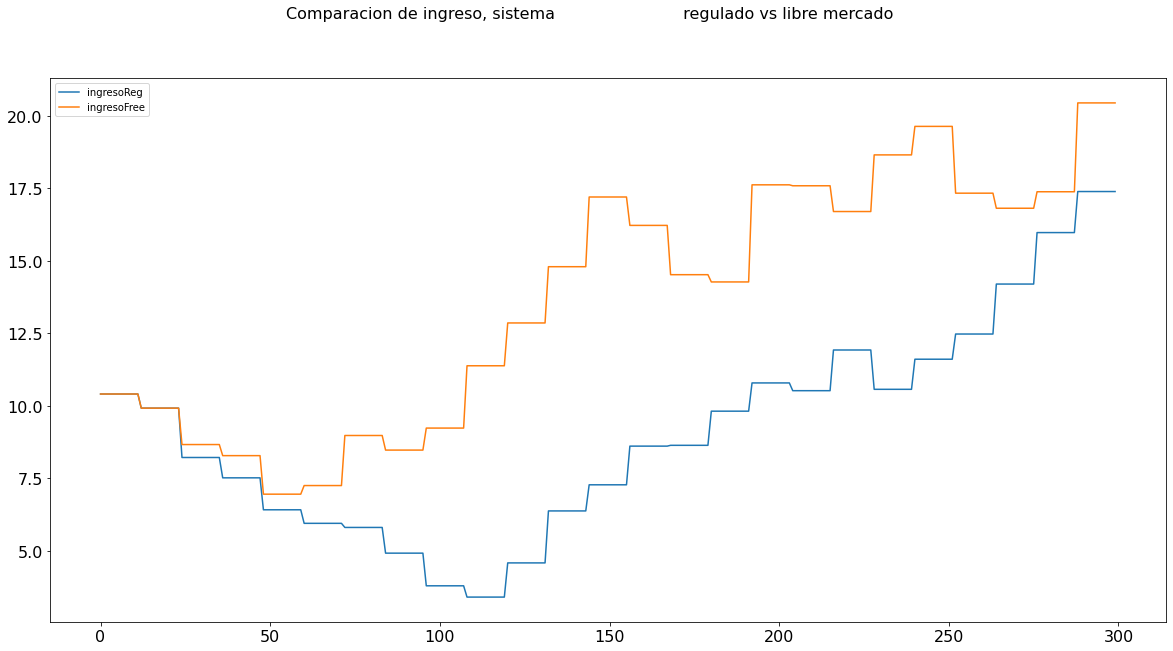

In [14]:
tools.graficar_comparacion(compare, ["ingresoReg", "ingresoFree"],
                        'Comparacion de ingreso, sistema \
                        regulado vs libre mercado')

<module 'matplotlib.pyplot' from '/home/zero/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

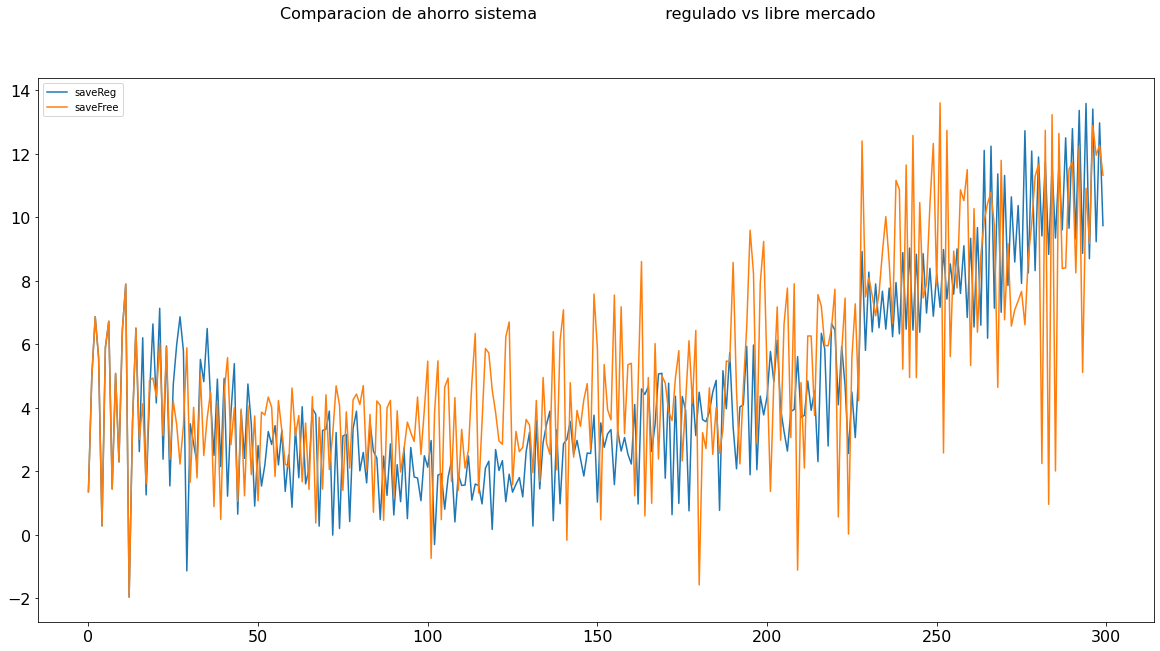

In [15]:
tools.graficar_comparacion(compare, ["saveReg", "saveFree"],
                        'Comparacion de ahorro sistema \
                        regulado vs libre mercado')

<module 'matplotlib.pyplot' from '/home/zero/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

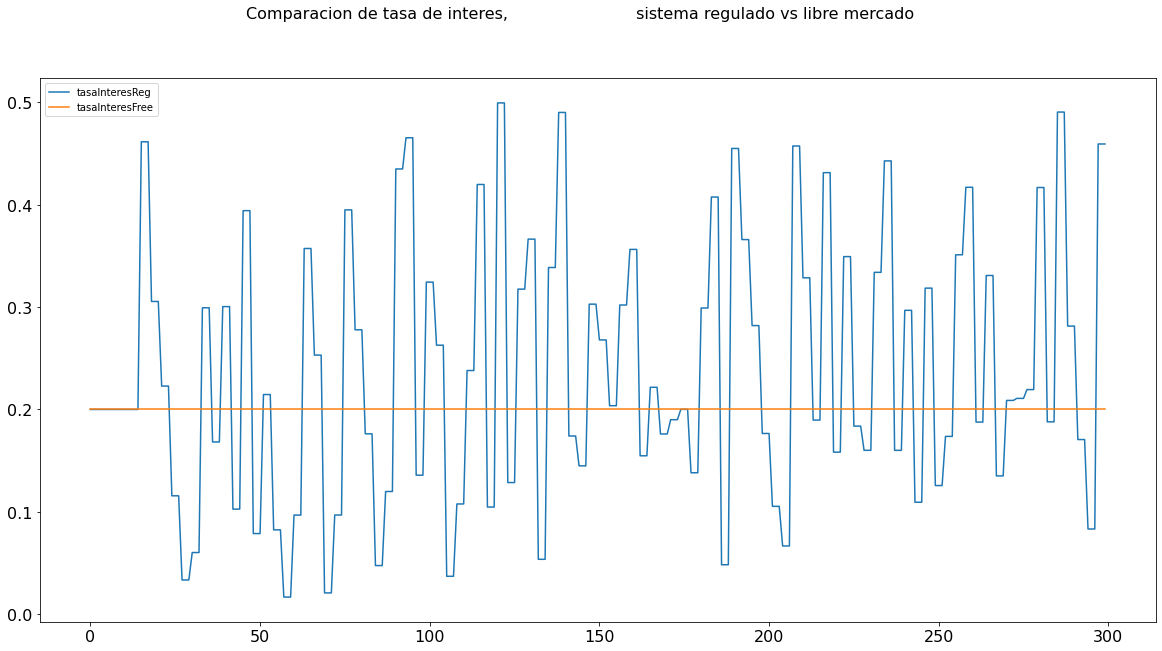

In [16]:
tools.graficar_comparacion(compare, ["tasaInteresReg", "tasaInteresFree"],
                        'Comparacion de tasa de interes, \
                        sistema regulado vs libre mercado')

### Resultados Estadisticos de las Series

In [17]:
compare[['ingresoReg', 'DemandaReg', 'ksInvReg',
        'saveReg', 'tasaInteresReg']].describe()

,ingresoReg,DemandaReg,ksInvReg,saveReg,tasaInteresReg
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,9.078783,9.114262,1.839235,4.526985,0.238295
std,3.576392,3.943362,0.463342,3.118800,0.127870
min,3.397425,2.650760,1.416985,-1.960094,0.016812
25%,6.369620,5.963154,1.544374,2.288236,0.137606
50%,8.632654,8.525821,1.654297,3.783059,0.206242
75%,10.784773,11.524587,1.920000,6.442054,0.331564
max,17.386801,20.296429,3.276491,13.574837,0.499295


In [18]:
compare[['ingresoFree', 'DemandaFree', 'ksInvFree',
        'saveFree', 'tasaInteresFree']].describe()

,ingresoFree,DemandaFree,ksInvFree,saveFree,tasaInteresFree
count,300.000000,300.000000,300.000000,300.000000,3.000000e+02
mean,13.659625,13.200981,1.762903,5.127146,2.000000e-01
std,4.225524,4.516738,0.257037,3.158617,1.028672e-15
min,6.947660,5.386233,1.455207,-1.960094,2.000000e-01
25%,9.227382,9.232548,1.544374,2.908428,2.000000e-01
50%,14.518472,13.020450,1.672392,4.535789,2.000000e-01
75%,17.330257,16.533124,1.920000,6.871612,2.000000e-01
max,20.443884,24.030101,2.335854,13.592316,2.000000e-01


## Evaluacion de Resultados de Aplicacion de Algoritmos Geneticos 

### Sistema Generado con Resultados Aleatorios

Resultados escritos en ./resultadosAleatorios


/home/zero/Documentos/TRABAJO FINAL/codigoPreliminar/sistema_economico/banco_central.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_decomp["cycle"] = cycle
/home/zero/Documentos/TRABAJO FINAL/codigoPreliminar/sistema_economico/banco_central.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_decomp["trend"] = trend


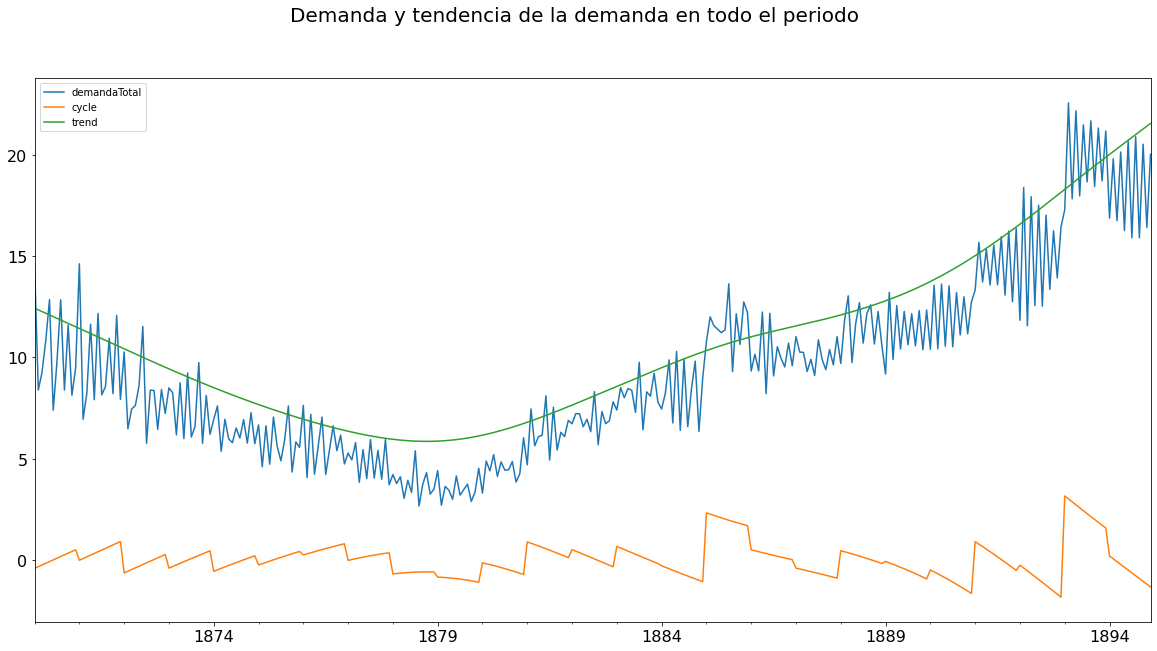

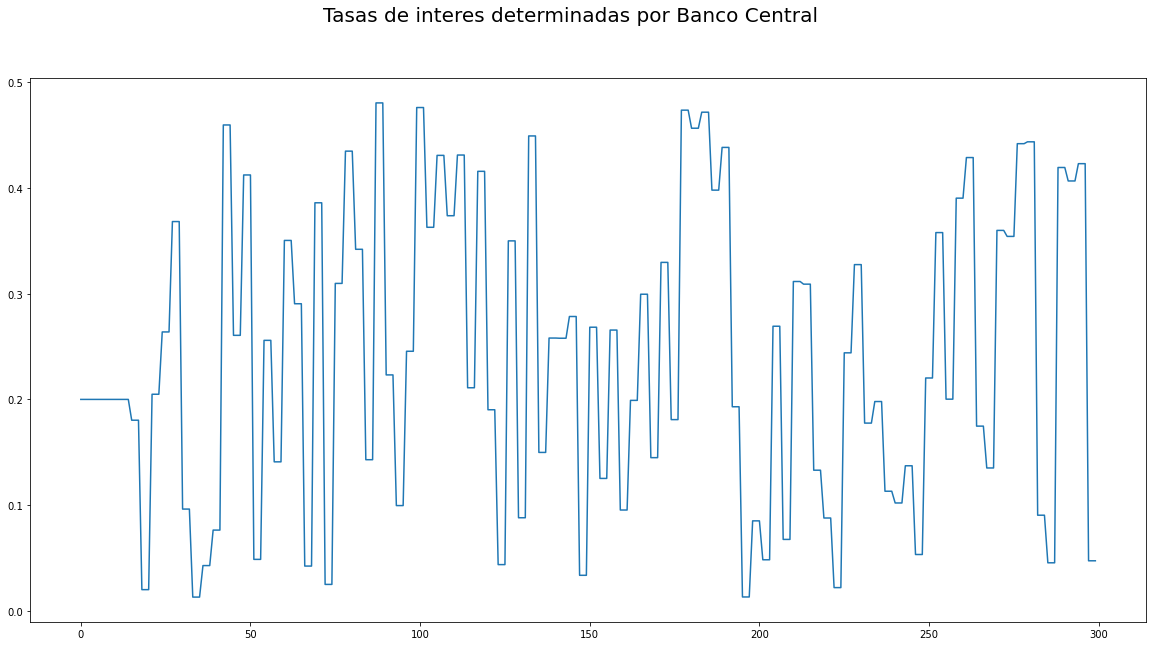

In [19]:
# cualquera
modelo = econoblack.economy(year, cambioPrefe=camPre, r=intRate)
modelo.ruta = rutaModeloCualquiera
modelo.agenteConsumidor(propConsumo)
modelo.agenteprodConsumo(alpci=AphC, tci=1, deci=10)
modelo.agenteprodInver(alpin=AphIn, tin=1)
modelo.generarSistema(modelo = 0)

### Sistema Generado con Algoritmo Genetico de una Generacion

Resultados escritos en ./resultadosUnicaGeneracion


/home/zero/Documentos/TRABAJO FINAL/codigoPreliminar/sistema_economico/banco_central.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_decomp["cycle"] = cycle
/home/zero/Documentos/TRABAJO FINAL/codigoPreliminar/sistema_economico/banco_central.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_decomp["trend"] = trend


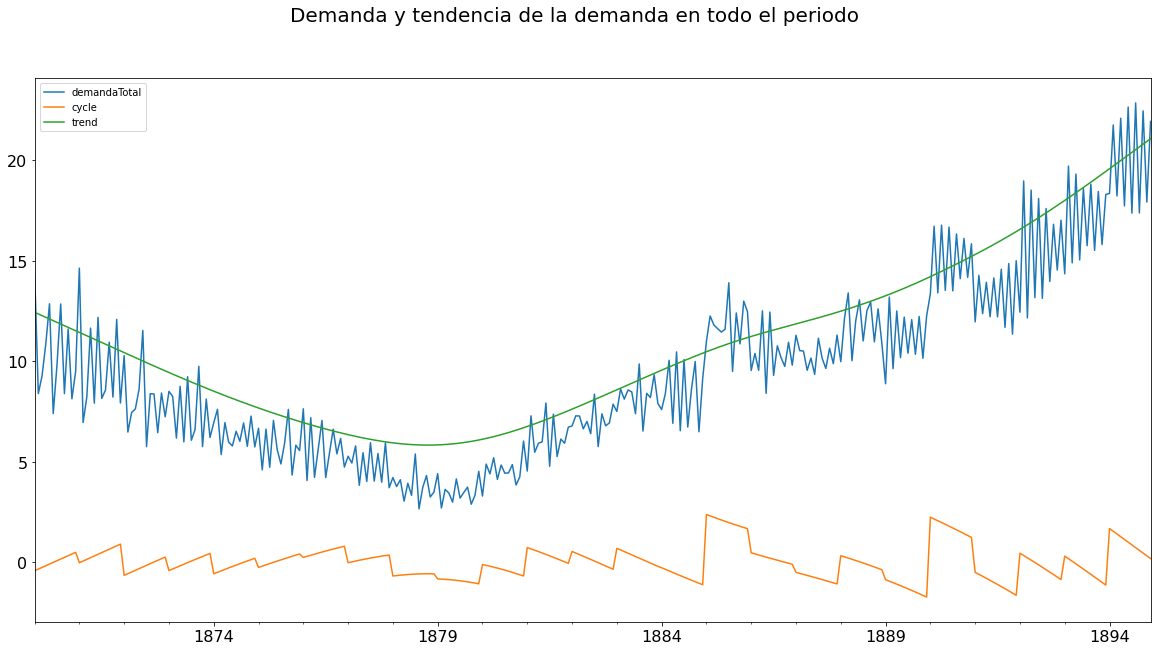

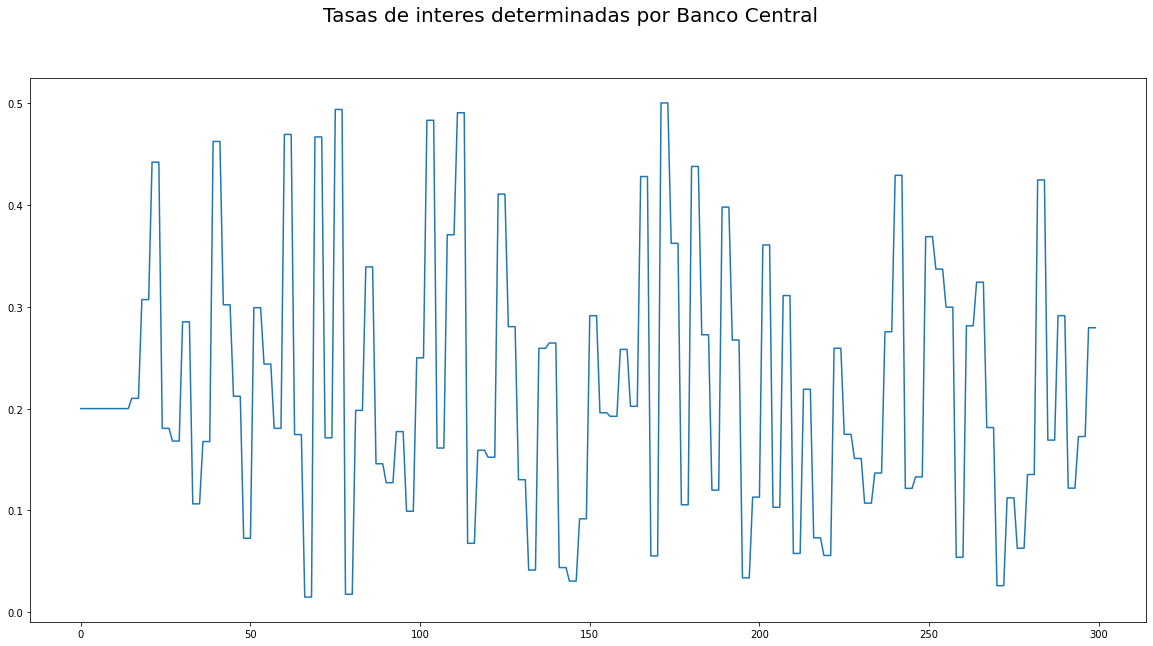

In [20]:
# primero
modelo = econoblack.economy(year, cambioPrefe=camPre, r=intRate)
modelo.ruta = rutaModeloPrimero
modelo.agenteConsumidor(propConsumo)
modelo.agenteprodConsumo(alpci=AphC, tci=1, deci=10)
modelo.agenteprodInver(alpin=AphIn, tin=1)
modelo.generarSistema(modelo=1, maxGenBank= 1)

### Comparacion de resultados

In [5]:
fileCualquiera = './resultadosAleatorios/SISTEMAECOPOLMON.txt'
filePrimero = './resultadosUnicaGeneracion/SISTEMAECOPOLMON.txt'
encabezadoSistema = ['year', 'periodo', 'demandaTotal',
                    'consumo', 'ingreso', 'demandaCapital', 'consumoAuto',
                    'ksCon', 'ksInv', 'ofertaGlob', 'save', 'tasaInteres']


# datos de sistema completo datosPol
datosCualquiera = tools.getDatos(fileCualquiera, encabezadoSistema)
datosPrimero = tools.getDatos(filePrimero, encabezadoSistema)

# Variables comunes comparacion
encabezadosRevisar = ['demandaTotal', 'ksCon',
                    'ksInv', 'ingreso', 'save', 'tasaInteres']

# Encabezado sistema con algoritmo genetico

encaGenetico = ['DemandaGen', 'ksConGen', 'ksInvGen',
                'ingresoGen', 'saveGen', 'tasaInteresGen']

# Encabezados sistema con algoritmo aleatoria
encaAleatori = ['DemandaCualquiera', 'ksConCualquiera', 'ksInvCualquiera',
                'ingresoCualquiera', 'saveCualquiera', 'tasaInteresCualquiera']

# Encabezados sistema con algoritmo de una generacion
encaUnicaGen = ['DemandaPrimero', 'ksConPrimero', 'ksInvPrimero',
                'ingresoPrimero', 'savePrimero', 'tasaInteresPrimero']

In [6]:
genticoVScualquiera = tools.makeCompareDf(datosPol, datosCualquiera,
                            encabezadosRevisar, encabezadosRevisar,
                            encaGenetico, encaAleatori)

NameError: name 'datosPol' is not defined

In [11]:

genticoVSprimero = tools.makeCompareDf(datosPol, datosPrimero,
                                    encabezadosRevisar, encabezadosRevisar,
                                    encaGenetico, encaUnicaGen)

### Algoritmo Genetico Completo VS Algoritmo Aleatorio

#### Prueba Krustall Wallis para media de Algoritmo Genetico completo y Algoritmo Aleatorio

In [24]:
variablesTest = [("DemandaGen", "DemandaCualquiera"),
                ("ingresoGen", "ingresoCualquiera"), 
                ("tasaInteresGen", "tasaInteresCualquiera")]
res = tools.diferencia_medias_krwall(genticoVScualquiera, variablesTest)
for key, item in res.items():
    print(key, item)

DemandaGen:Media:9.114262059770272
DemandaGen:Varianza:15.550102770274247
DemandaCualquiera:Media: 9.36339372556432
DemandaCualquiera:Varianza: 19.548772832631354
---------------
ingresoGen:Media:9.078783271365815
ingresoGen:Varianza:12.790578894911558
ingresoCualquiera:Media: 9.214147700733369
ingresoCualquiera:Varianza: 14.45052788782219
---------------
tasaInteresGen:Media:0.2382953585819644
tasaInteresGen:Varianza:0.016350848402100614
tasaInteresCualquiera:Media: 0.23996428245903667
tasaInteresCualquiera:Varianza: 0.019781066633873225
---------------
Prueba KW de media 
         para variables ('DemandaGen', 'DemandaCualquiera') KruskalResult(statistic=0.036210005205098525, pvalue=0.8490824635432759)
Prueba KW de media 
         para variables ('ingresoGen', 'ingresoCualquiera') KruskalResult(statistic=0.018418372249412514, pvalue=0.892047139567796)
Prueba KW de media 
         para variables ('tasaInteresGen', 'tasaInteresCualquiera') KruskalResult(statistic=0.01310208876191352, p

#### Prueba F para diferencia de Varianza de Algoritmo Genetico completo y Algoritmo Aleatorio

In [25]:
# diferencias de varianza de demanda
tools.f_test(genticoVScualquiera.DemandaGen.values.tolist(),
            genticoVScualquiera.DemandaCualquiera.values.tolist())

4649.480728312003 5845.083076956778 299 299


(1.2571475006583885, 0.024148267475530116, 1.2099167425932442)

In [ ]:
# diferencia de varianza de ingresos
tools.f_test(genticoVScualquiera.ingresoGen.values.tolist(),
            genticoVScualquiera.ingresoCualquiera.values.tolist())


In [ ]:
# diferencia de varianza de tasas de interes
tools.f_test(genticoVScualquiera.tasaInteresGen.values.tolist(),
            genticoVScualquiera.tasaInteresCualquiera.values.tolist())

<module 'matplotlib.pyplot' from '/home/zero/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

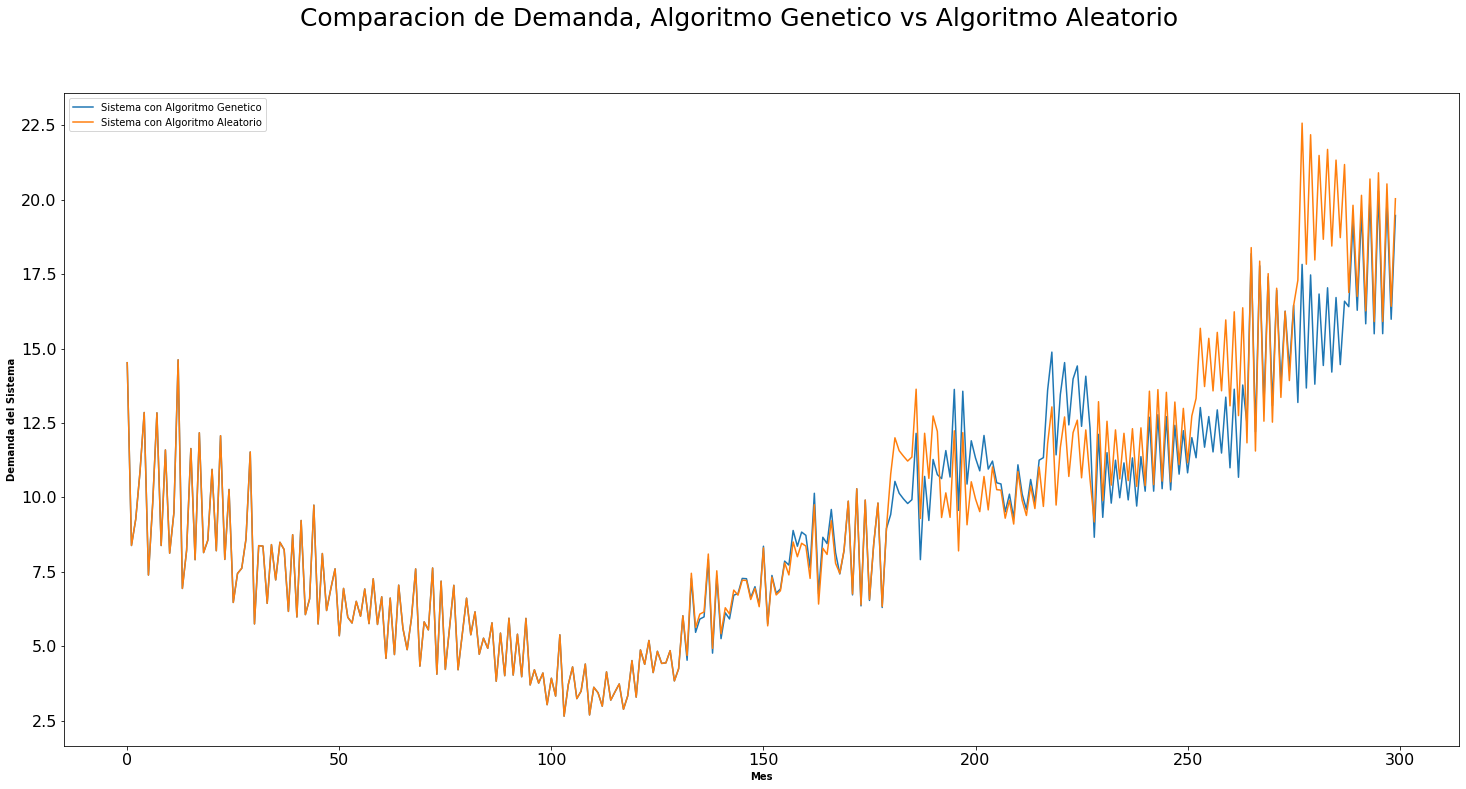

In [12]:
datosGrafica = {
    'titulo': 'Comparacion de Demanda, Algoritmo Genetico vs Algoritmo Aleatorio',
    'xname': 'Mes',
    'yname': 'Demanda del Sistema',
    'serie1': 'Sistema con Algoritmo Genetico',
    'serie2': 'Sistema con Algoritmo Aleatorio'}
tools.graficas_comparacion(genticoVScualquiera, [
    "DemandaGen", "DemandaCualquiera"], datosGrafica)

<module 'matplotlib.pyplot' from '/home/zero/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

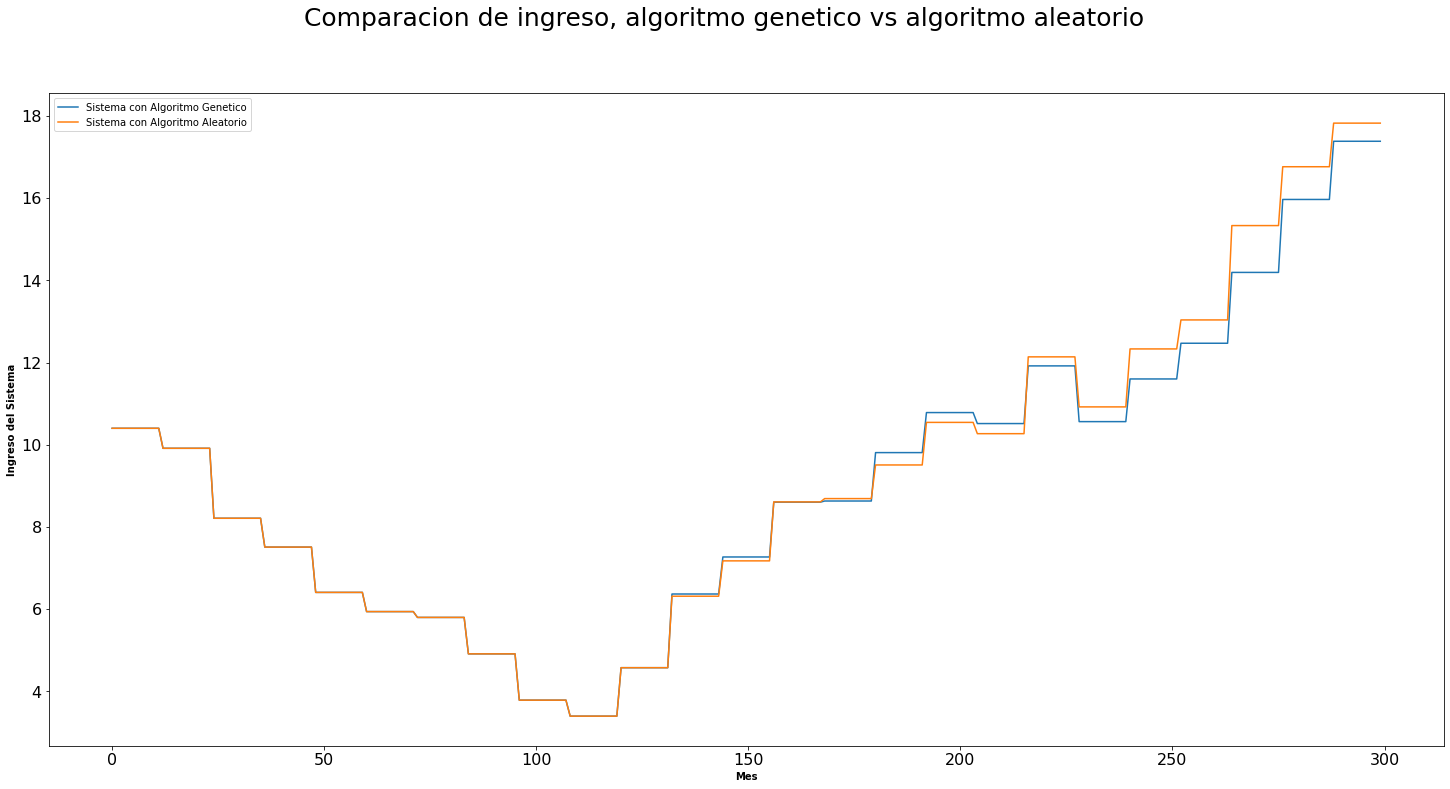

In [27]:
datosGrafica = {
    'titulo': 'Comparacion de ingreso, algoritmo genetico vs algoritmo aleatorio',
    'xname': 'Mes',
    'yname': 'Ingreso del Sistema',
    'serie1': 'Sistema con Algoritmo Genetico',
    'serie2': 'Sistema con Algoritmo Aleatorio'}
tools.graficas_comparacion(genticoVScualquiera, [
    "ingresoGen", "ingresoCualquiera"], datosGrafica)


<module 'matplotlib.pyplot' from '/home/zero/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

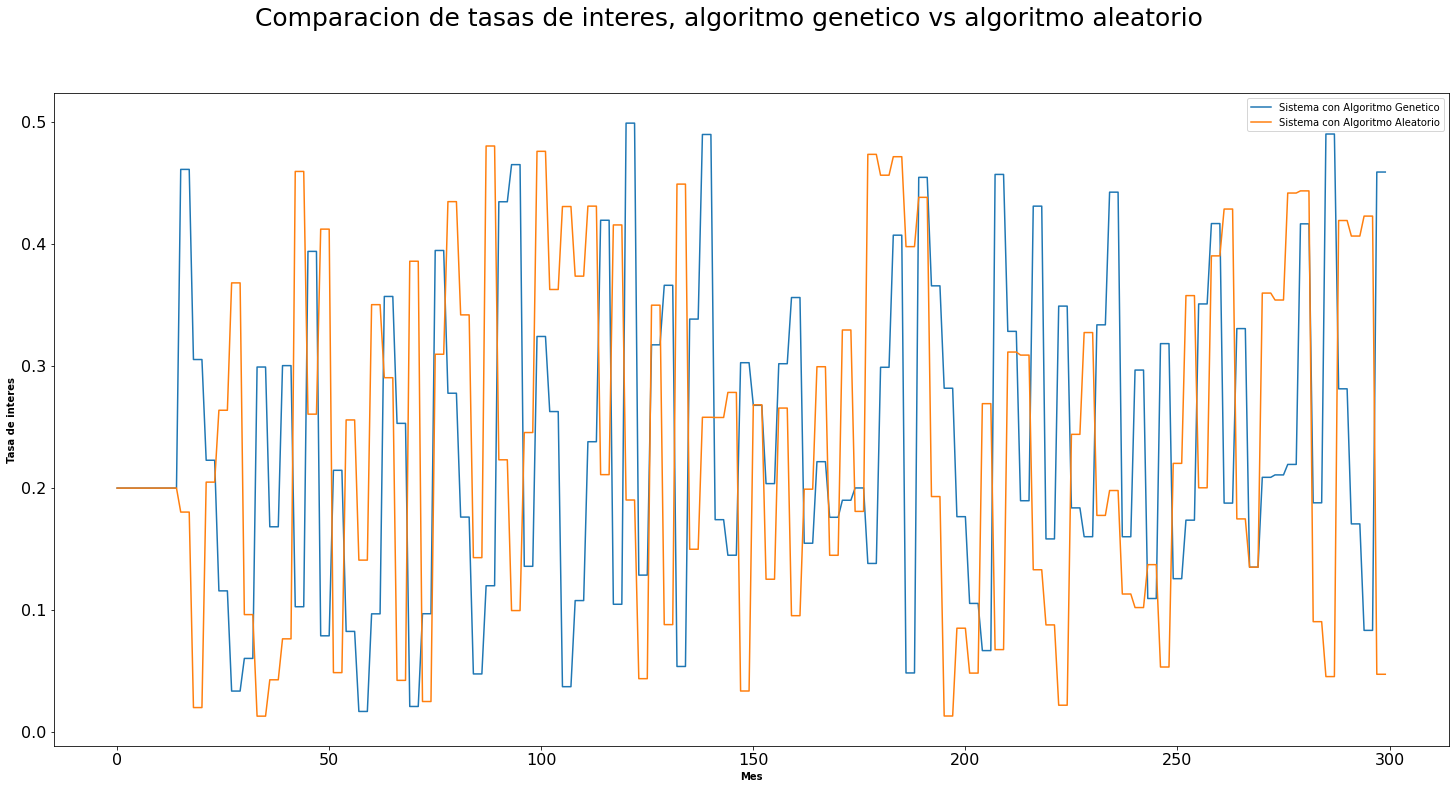

In [28]:
datosGrafica = {
    'titulo': 'Comparacion de tasas de interes, algoritmo genetico vs algoritmo aleatorio',
    'xname': 'Mes',
    'yname': 'Tasa de interes',
    'serie1': 'Sistema con Algoritmo Genetico',
    'serie2': 'Sistema con Algoritmo Aleatorio'}
tools.graficas_comparacion(genticoVScualquiera, [
    "tasaInteresGen", "tasaInteresCualquiera"], datosGrafica)


### Algoritmo Genetico Completo VS Algoritmo de una Generacion

#### Prueba F para diferencia de Varianza de Algoritmo Genetico completo y Algoritmo de una Generacion

In [29]:
variablesTest = [("DemandaGen", "DemandaPrimero"),
                ("ingresoGen", "ingresoPrimero"), ("tasaInteresGen", "tasaInteresPrimero")]
res = tools.diferencia_medias_krwall(genticoVSprimero, variablesTest)
for key, item in res.items():
    print(key, item)

DemandaGen:Media:9.114262059770272
DemandaGen:Varianza:15.550102770274247
DemandaPrimero:Media: 9.444325229389715
DemandaPrimero:Varianza: 19.702763336267857
---------------
ingresoGen:Media:9.078783271365815
ingresoGen:Varianza:12.790578894911558
ingresoPrimero:Media: 9.40641545295038
ingresoPrimero:Varianza: 16.262703258546725
---------------
tasaInteresGen:Media:0.2382953585819644
tasaInteresGen:Varianza:0.016350848402100614
tasaInteresPrimero:Media: 0.2206338763581608
tasaInteresPrimero:Varianza: 0.016510509915415413
---------------
Prueba KW de media 
         para variables ('DemandaGen', 'DemandaPrimero') KruskalResult(statistic=0.24739674593232472, pvalue=0.6189141029391971)
Prueba KW de media 
         para variables ('ingresoGen', 'ingresoPrimero') KruskalResult(statistic=0.46050355564078477, pvalue=0.4973887297947235)
Prueba KW de media 
         para variables ('tasaInteresGen', 'tasaInteresPrimero') KruskalResult(statistic=3.3930655109946164, pvalue=0.06547111949070616)


#### Prueba F para diferencia de Varianza de Algoritmo Genetico completo y Algoritmo de una Generacion

In [30]:
# diferencia de varianzas de la demanda
tools.f_test(genticoVSprimero.DemandaGen.values.tolist(),
            genticoVSprimero.DemandaPrimero.values.tolist())

4649.480728312003 5891.126237544092 299 299


(1.2670503614890494, 0.020560725306151162, 1.2099167425932442)

In [ ]:
# diferencia de varianza de ingreso
tools.f_test(genticoVSprimero.ingresoGen.values.tolist(),
            genticoVSprimero.ingresoPrimero.values.tolist())


In [ ]:
# diferencia de varianza de tasas de interes
tools.f_test(genticoVSprimero.tasaInteresGen.values.tolist(),
            genticoVSprimero.tasaInteresPrimero.values.tolist())

<module 'matplotlib.pyplot' from '/home/zero/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

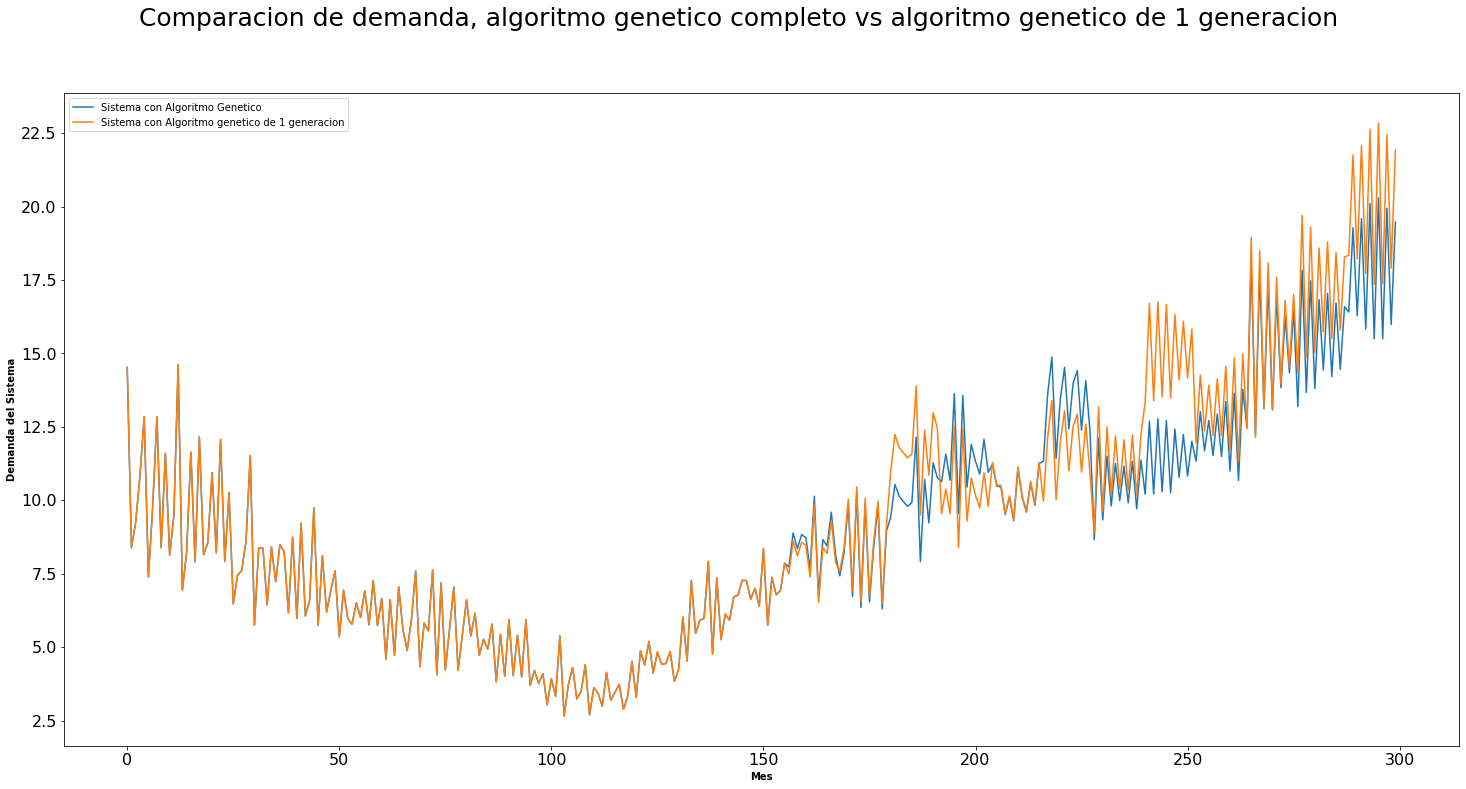

In [31]:
datosGrafica = {
    'titulo': 'Comparacion de demanda, algoritmo genetico completo vs algoritmo genetico de 1 generacion',
    'xname': 'Mes',
    'yname': 'Demanda del Sistema',
    'serie1': 'Sistema con Algoritmo Genetico',
    'serie2': 'Sistema con Algoritmo genetico de 1 generacion'}
tools.graficas_comparacion(genticoVSprimero, [
    "DemandaGen", "DemandaPrimero"], datosGrafica)

<module 'matplotlib.pyplot' from '/home/zero/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

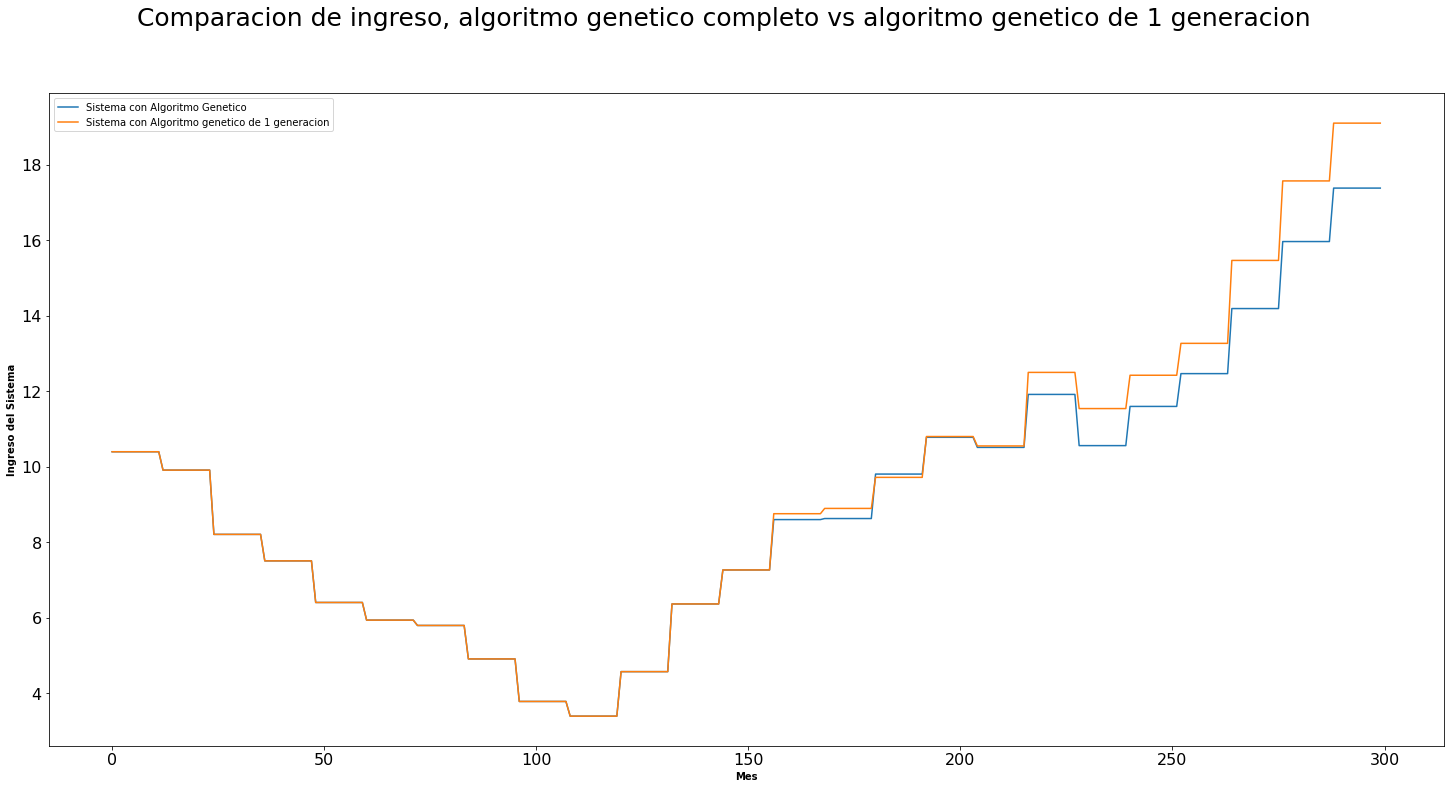

In [32]:
datosGrafica = {
    'titulo': 'Comparacion de ingreso, algoritmo genetico completo vs algoritmo genetico de 1 generacion',
    'xname': 'Mes',
    'yname': 'Ingreso del Sistema',
    'serie1': 'Sistema con Algoritmo Genetico',
    'serie2': 'Sistema con Algoritmo genetico de 1 generacion'}
tools.graficas_comparacion(genticoVSprimero, [
    "ingresoGen", "ingresoPrimero"], datosGrafica)


<module 'matplotlib.pyplot' from '/home/zero/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

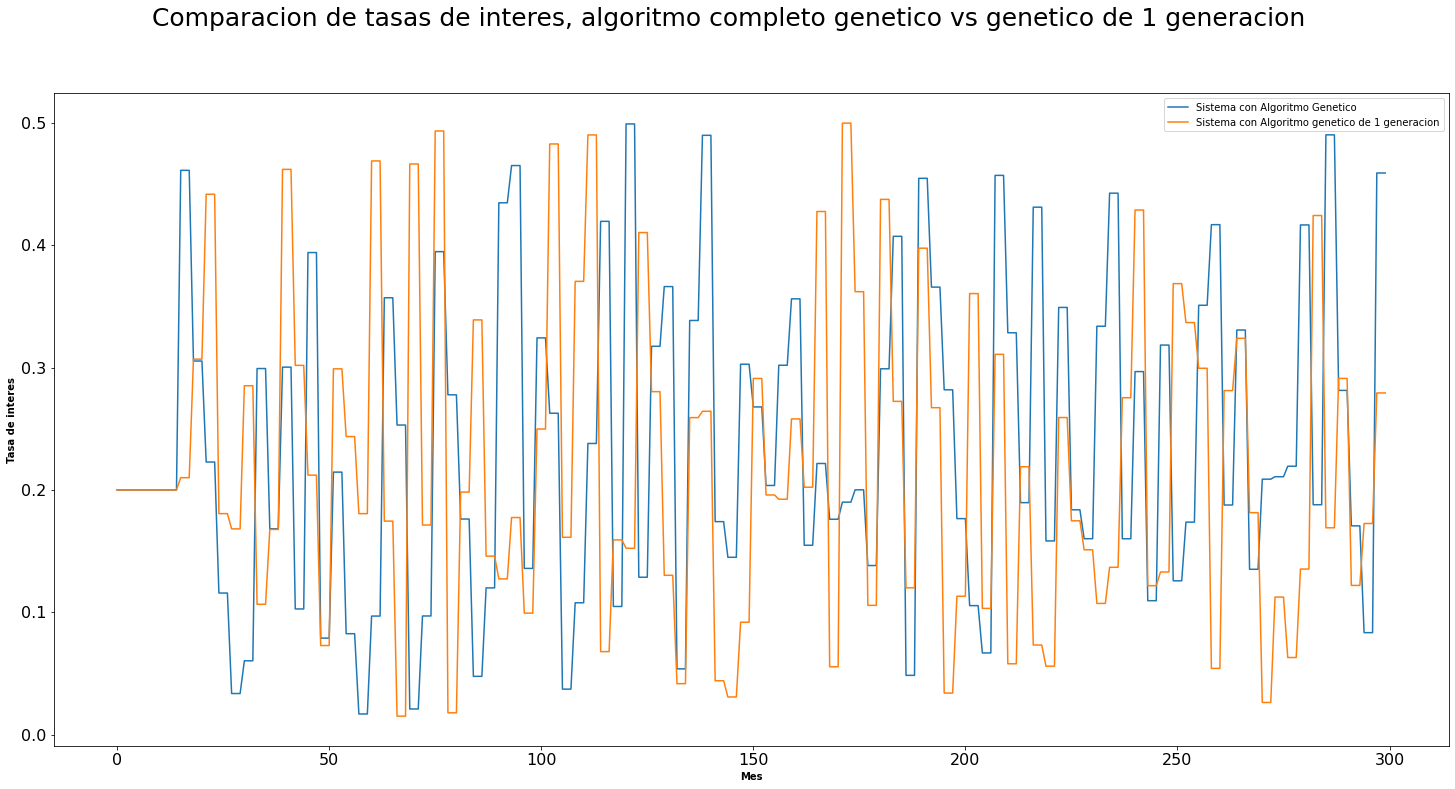

In [33]:
datosGrafica = {
    'titulo': 'Comparacion de tasas de interes, algoritmo completo genetico vs genetico de 1 generacion',
    'xname': 'Mes',
    'yname': 'Tasa de interes',
    'serie1': 'Sistema con Algoritmo Genetico',
    'serie2': 'Sistema con Algoritmo genetico de 1 generacion'}
tools.graficas_comparacion(genticoVSprimero, [
    "tasaInteresGen", "tasaInteresPrimero"], datosGrafica)


### Espacio valido de parametros

<Axes3DSubplot:title={'center':'Region aceptable de parámetros'}, xlabel='Parámetro Alpha', ylabel='Parámetro Beta'>

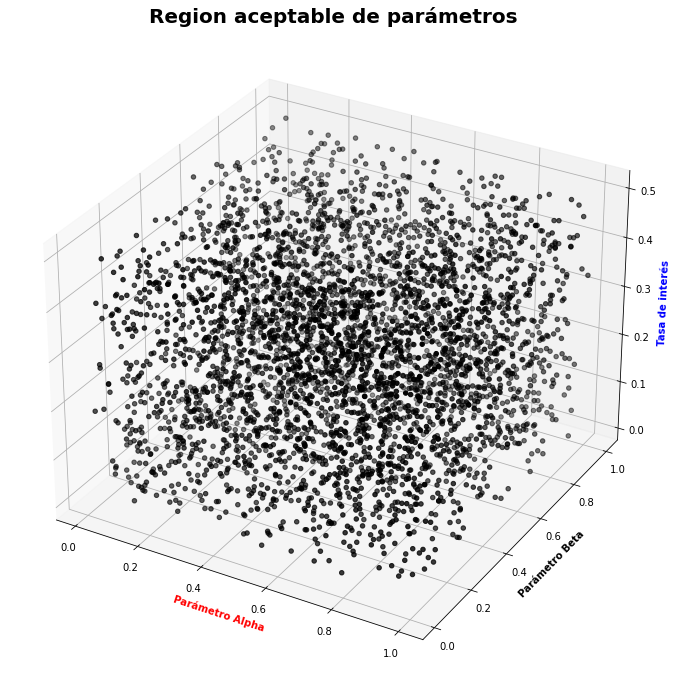

In [7]:
tools.espacio_valido()